In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
import os
import json
from tqdm import tqdm
import pandas as pd

torch.cuda.set_device(1)

In [1]:
import os
import json

In [ ]:
out_list = []
for i in os.listdir("test"):
    with open("test/" + i, "r") as fich:
        content = json.load(fich)
    for j in content:
        if not j["text_body"] == "":
            out_list.append(j["text_body"])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(out_list)

In [18]:
print(out_list[:50])

["Les meurtres ont été commis mercredi soir dans la petite localité de 500 habitants située à l'ouest de Saint-Jovite. Le présumé meurtrier, âgé de 17 ans, deviendra majeur la semaine prochaine. Un juge pourrait décider, à la demande de la Couronne, qu'il soit jugé comme adulte. Le suspect se trouvait encore dans la maison quand les policiers sont arrivés. Le corps du père a été retrouvé dans l'atelier et celui de la mère, dans le sous-sol. Le suspect n'habitait plus avec chez ses parents, selon des témoignages recueillis sur place, et il aurait eu des problèmes de consommation de drogue. Dans une entrevue à TVA, son colocataire et ami affirme que ces assassinats ont été longuement muris et que l'accusé nourrissait depuis longtemps de la rage contre ses parents. Pour en savoir plus vous pouvez visionner le reportage de Jean-François Guérin en RealVideo. Pour ce faire, cliquez sur l'icône rouge firgurant au bas de la photo.", 'Kei Kamara a envoyé l’Impact de Montréal en vacances en marq

In [6]:
bs = 48

In [7]:
lang = 'fr'

In [8]:
path = Path("/home/momgpu/Documents/NLP/course/data/TVA")

In [9]:
mdl_path = Path("/home/momgpu/.fastai/data/TVA")

In [10]:
path

PosixPath('/home/momgpu/Documents/NLP/course/data/TVA')

In [11]:
data = load_data(mdl_path, "TVA99klm", bs=bs)

In [12]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0, callback_fns=ShowGraph, pretrained=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


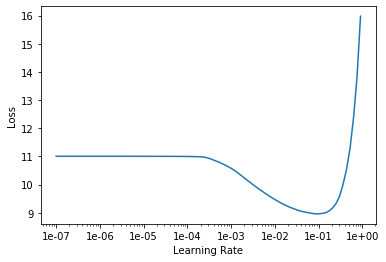

In [13]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,77.141571,71.219215,0.002033,18:23
1,6.826468,6.837417,0.088588,18:22
2,5.461543,5.450494,0.189513,18:32


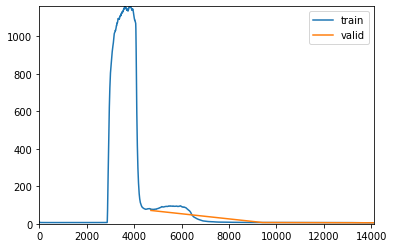

In [14]:
learn.fit_one_cycle(3, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.260570,4.268307,0.259327,18:35
1,4.073133,4.066251,0.276694,18:35
2,3.875628,3.881546,0.297579,18:35
3,3.727603,3.753803,0.311962,18:35


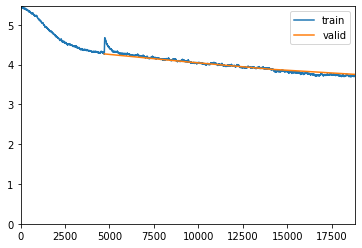

In [15]:
learn.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.654045,3.695055,0.318429,18:33
1,3.463784,3.514987,0.336927,18:34
2,3.318991,3.369116,0.352748,18:34
3,3.178317,3.277124,0.363899,18:33
4,3.058954,3.252873,0.367390,18:32


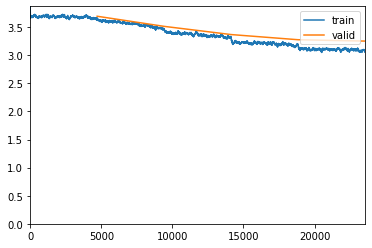

In [16]:
learn.unfreeze()
learn.fit_one_cycle(5, 2e-3, moms=(0.8,0.7))

In [17]:
learn.save(mdl_path/'2ndTVA_clean')

In [18]:
learn.data.vocab.save(mdl_path/'2ndTVA_clean')

In [19]:
learn.export(mdl_path/"2ndTVA_clean.pkl")

In [23]:
learn.predict("", 200, temperature=0.4)

" La perte nette pour le trimestre terminé le 30 septembre 2003 a été de 1,5M$ , ou 0,03 $ par action , comparativement à une perte nette de 12M$ ( 0,03 $ par action ) pour le trimestre correspondant de l' exercice précédent . Les ventes ont augmenté de 9 % à EN juillet , passant de 2,1M$ à LA Société , en raison de la baisse des revenus de la société . Les revenus tirés des activités de la compagnie ont augmenté de 8 % pour atteindre 2,3G$ , ce qui représente une hausse de 2M$ par rapport à l' an dernier . Le bénéfice net du troisième trimestre de 2003 a été de BAIIA et de SAVOIR , contre 2M$ en 2002 . Le bénéfice net attribuable aux activités poursuivies s' est élevé à ( BAIIA ) , en regard de 1,7M$ pour la période correspondante de l' exercice précédent . Le bénéfice net a augmenté de 1,4M$ pour le trimestre , passant de 1,7M$ en 2002 à 6M$ pour la période correspondante de l'"